TO DO TASK

3.1

Problem 1

In [22]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_AI/bank.csv")
# dataset.head(3)
# dataset.info()

#object dtype columns
print("columns with object dtype ")
object_cols = dataset.select_dtypes (include='object')
print((object_cols))

#unique value in those columns
print("unique value in those columns")
for col in object_cols:
  print(col)
  print(dataset[col].unique())

#null values in those columns
print("null values in those columns")
print(dataset.isnull().sum())


columns with object dtype 
                job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome    y  
0       may  unknown   no  
1   

1.2

In [24]:
#drop all columns with dtype object and save in new csv
banknumeric_data = dataset.drop(columns=object_cols.columns)
banknumeric_data.to_csv("/content/drive/MyDrive/Concept_and_technologies_of_AI/banknumericdata.csv")
banknumeric_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


1.3

In [27]:
dataset2 = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_AI/banknumericdata.csv")
dataset2.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2

In [49]:
import pandas as pd
import numpy as np
medical_dataset = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_AI/medical_students_dataset.csv")
#medical_dataset.info()

#column with null values
print("column with null values")
print(medical_dataset.isnull().sum())

#filling the missing values
print("filling the missing values")

number_column = medical_dataset.select_dtypes(include=[np.number]).columns
category_column= medical_dataset.select_dtypes(include="object").columns

medical_imputedfile= medical_dataset.copy()

# for Numeric = median as median tames outliers and age is skewed values
for column in number_column:
    if medical_imputedfile[column].isnull().sum() > 0:
        fill_median = medical_imputedfile[column].median()
        medical_imputedfile[column].fillna(fill_median)
        print(f"Filled numeric column '{column}' with median= {fill_median}")

# for Categorical = mode
for column in category_column:
    if medical_imputedfile[column].isnull().sum() > 0:
        mode_value = medical_imputedfile[column].mode()[0]
        medical_imputedfile[column].fillna(mode_value)
        print(f"Filled categorical column '{column}' with mode = {mode_value}")

print("Missing values after imputation:")
print(medical_imputedfile.isnull().sum())
medical_imputedfile.head()

#duplicate values
with_duplicates = medical_imputedfile.duplicated().sum()
print("Duplicates before:",with_duplicates)
medical_no_duplicates = medical_imputedfile.drop_duplicates()
duplicates_remove = medical_no_duplicates.duplicated().sum()
print("Duplicates after:", duplicates_remove)
print("Shape before:", medical_imputedfile.shape)
print("Shape after: ", medical_no_duplicates.shape)




column with null values
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
filling the missing values
Filled numeric column 'Student ID' with median= 49943.5
Filled numeric column 'Age' with median= 26.0
Filled numeric column 'Height' with median= 174.8999141442403
Filled numeric column 'Weight' with median= 69.9793837798508
Filled numeric column 'BMI' with median= 22.671401449817218
Filled numeric column 'Temperature' with median= 98.5996537029178
Filled numeric column 'Heart Rate' with median= 80.0
Filled numeric column 'Blood Pressure' with median= 115.0
Filled numeric column 'Cholesterol' with median= 184.0
Filled categorical column 'Gender' with mode = Male
Filled categorical column 'Blood Type' with mode = B
Fi

3.2

Problem 1

In [44]:
import pandas as pd
titanic_dataset = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_AI/Titanic-Dataset.csv")
titanic_dataset.info()
columns = ["Name", "Pclass", "Sex", "Age", "Fare", "Survived"]
subset = titanic_dataset[columns]

first_class_passengers = subset[subset["Pclass"] == 1]

print("Statistics:")
print("Mean:", first_class_passengers["Fare"].mean())
print("Median:", first_class_passengers["Fare"].median())
print("Max:", first_class_passengers["Fare"].max())
print("Min:", first_class_passengers["Fare"].min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Statistics:
Mean: 84.1546875
Median: 60.287499999999994
Max: 512.3292
Min: 0.0


Problem 2

In [45]:
print("Null Age values:", first_class_passengers["Age"].isnull().sum())
print("Including null shape:", first_class_passengers.shape)
first_class_excluding_null = first_class_passengers.drop(columns="Age")
print("Excluding null shape:", first_class_excluding_null.shape)


Null Age values: 30
Including null shape: (216, 6)
Excluding null shape: (216, 5)


Problem 3

In [50]:
titanic_embarked = pd.get_dummies(titanic_dataset["Embarked"])

titanic_encoded = pd.concat([titanic_dataset, titanic_embarked], axis=1)
titanic_encoded.drop(columns="Embarked")

print("After encoding the dataset:")
titanic_encoded.head(5)


After encoding the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True


Problem 4

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


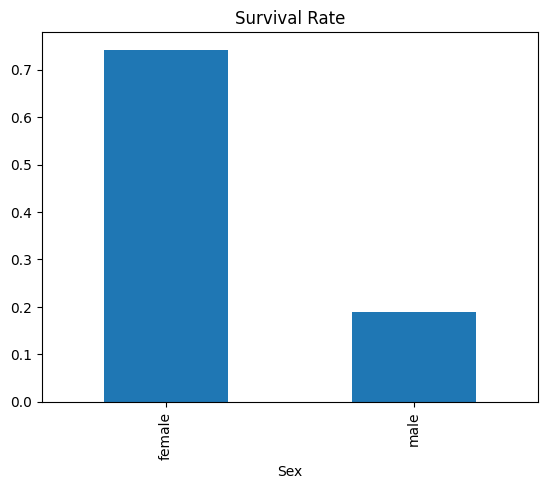

In [63]:
import matplotlib.pyplot as plt
survival_by_gender = titanic_dataset.groupby("Sex")["Survived"].mean()
print(survival_by_gender)
survival_by_gender.plot(kind="bar")
plt.title("Survival Rate")
plt.show()


Problem 5

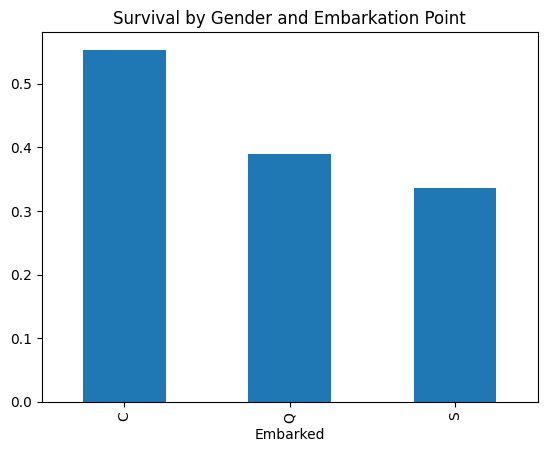

In [65]:
survival_by_gender_and_embarkation = (
    titanic_dataset.groupby(["Embarked"])["Survived"] .mean()
)
survival_by_gender_and_embarkation.plot(kind="bar")
plt.title("Survival by Gender and Embarkation Point")
plt.show()

Problem 6

/tmp/ipython-input-354109277.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_age.groupby(["AgeGroup", "Pclass"])["Survived"].mean()


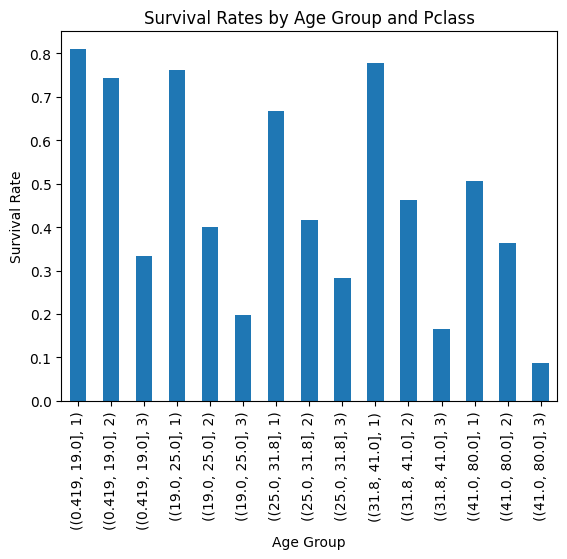

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_dataset = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_AI/Titanic-Dataset.csv")
data_age = titanic_dataset.dropna(subset=["Age"]).copy()
data_age["AgeGroup"] = pd.qcut(data_age["Age"], 5)

survival_age_byclass = (
    data_age.groupby(["AgeGroup", "Pclass"])["Survived"].mean()
)
survival_age_byclass.plot(kind="bar")
plt.title("Survival Rates by Age Group and Pclass")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

